___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [10]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [54]:
BAC = data.DataReader("BAC", 'iex', start, end)
GS = data.DataReader("CG", 'iex', start, end)
C = data.DataReader("C", 'iex', start, end)
JPM = data.DataReader("JPM", 'iex', start, end)
MS = data.DataReader("MS", 'iex', start, end) 
WFC = data.DataReader("WFC", 'iex', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [13]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [14]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [20]:
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2015-01-02   16.8293  16.8667  16.5394  16.7451   48951133  51.0969  51.4071   
2015-01-05   16.6375  16.6609  16.1745  16.2587  105605485  50.6739  50.7209   
2015-01-06   16.2961  16.3148  15.6974  15.7722  144912399  49.5177  49.6023   
2015-01-07   16.0342  16.0716  15.7816  15.8471  104603795  48.4179  48.4555   
2015-01-08   16.0529  16.2213  15.9967  16.1745   73388499  48.6623  48.9537   

Bank Ticker                              ...       MS                    \
Stock Info       low    close    volume  ...     open     high      low   
date                                     ...                              
2015-01-02   50.5611  51.0029  11139757  ...  35.5380  35.6290  34.8099   
2015-01-05   49.1887  49.3955  20945436  ...  35.0010  35.1193  33.8316   
2015-01-06   47.4968  47.6566  31989329  ...  34.1001  34.1638  32.8169   
2015-01-07   47.5767  48.0984  27890770  ...  33.6086  33.7178  33.3083   
2015-01-08   48.4085  48.8221  17470338  ...  33.9362  34.3640  33.9362   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2015-01-02   35.2285   7333790  48.2124  48.2824  47.4106  47.8537  11700856  
2015-01-05   34.1274  12507930  47.3638  47.5562  46.4539  46.5414  15000528  
2015-01-06   33.1445  16507812  46.6727  46.7776  45.3604  45.5704  20211187  
2015-01-07   33.6177   9957727  46.0428  46.0515  45.5879  45.8416  15714655  
2015-01-08   34.1183   8079561  46.3665  46.8782  46.3315  46.8564  16721579  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [23]:
bank_stocks.xs(key='close', level='Stock Info', axis=1).head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
date,,,,,,
2015-01-02,16.7451,51.0029,18.9518,55.9597,35.2285,47.8537
2015-01-05,16.2587,49.3955,18.7434,54.2224,34.1274,46.5414
2015-01-06,15.7722,47.6566,18.0708,52.8165,33.1445,45.5704
2015-01-07,15.8471,48.0984,18.0439,52.8971,33.6177,45.8416
2015-01-08,16.1745,48.8221,18.0944,54.0791,34.1183,46.8564


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [26]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [28]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.029047,-0.031516,-0.010996,-0.031046,-0.031256,-0.027423
2015-01-06,-0.029922,-0.035204,-0.035885,-0.025928,-0.028801,-0.020863
2015-01-07,0.004749,0.009270,-0.001489,0.001526,0.014277,0.005951
2015-01-08,0.020660,0.015046,0.002799,0.022345,0.014891,0.022137


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


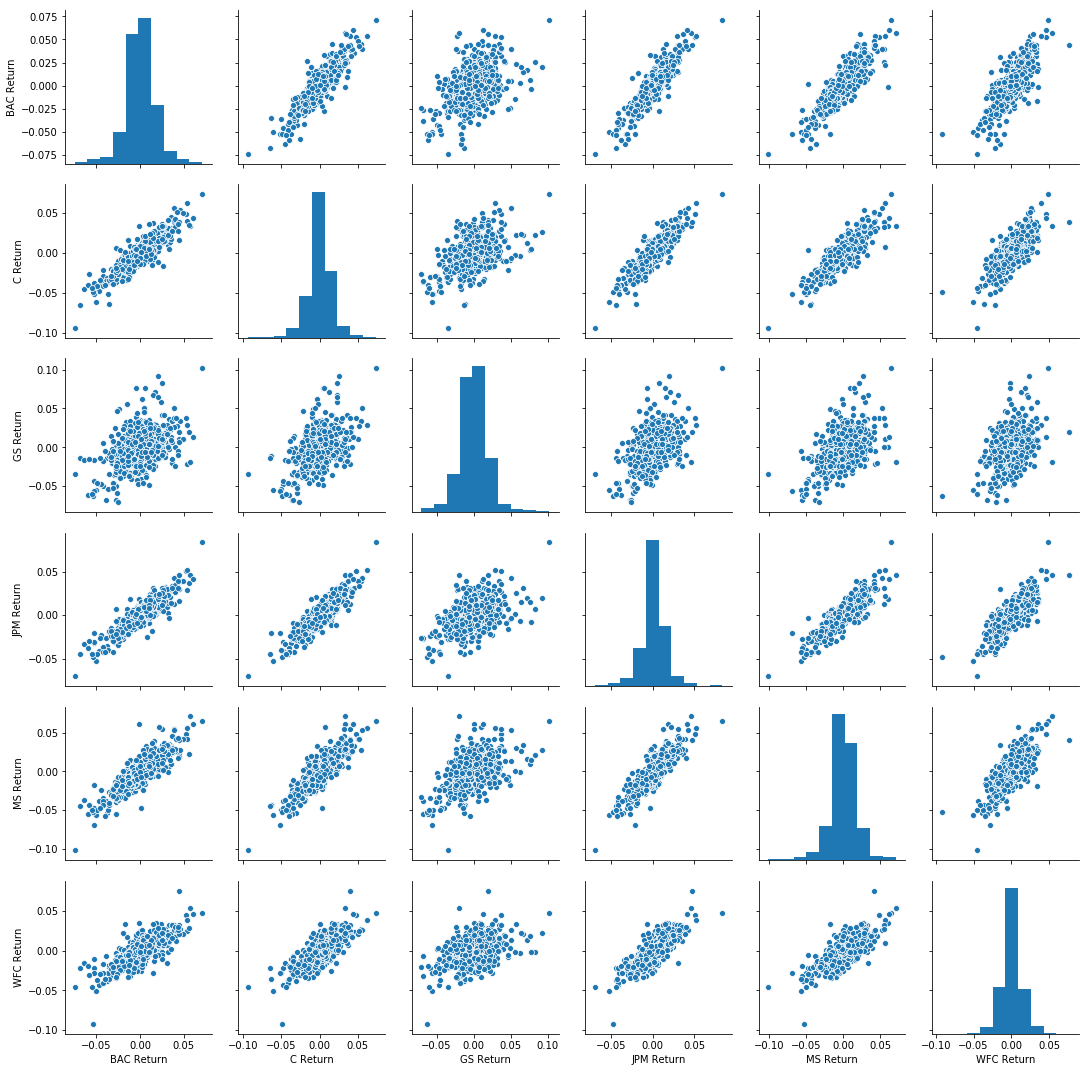

In [29]:
import seaborn as sns
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [30]:
returns.idxmin()

BAC Return    2016-06-24
C Return      2016-06-24
GS Return     2018-10-10
JPM Return    2016-06-24
MS Return     2016-06-24
WFC Return    2018-02-05
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [32]:
returns.idxmax()

BAC Return    2016-02-12
C Return      2016-02-12
GS Return     2016-02-12
JPM Return    2016-02-12
MS Return     2016-11-09
WFC Return    2016-11-10
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [33]:
returns.std()

BAC Return    0.016610
C Return      0.015710
GS Return     0.018966
JPM Return    0.013567
MS Return     0.017008
WFC Return    0.013463
dtype: float64

In [34]:
returns.ix['2015-01-01':'2015-12-31'].std()

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016206
C Return      0.015317
GS Return     0.018543
JPM Return    0.014031
MS Return     0.016319
WFC Return    0.012576
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\statsmodels\nonparametric\kd

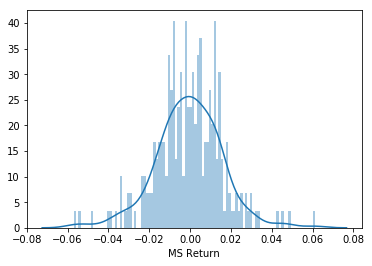

In [37]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'], bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


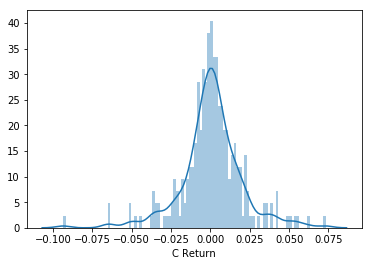

In [39]:
sns.distplot(returns.ix['2016-01-01':'2016-12-31']['C Return'], bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named '_plotly_future_'

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

NameError: name 'plt' is not defined

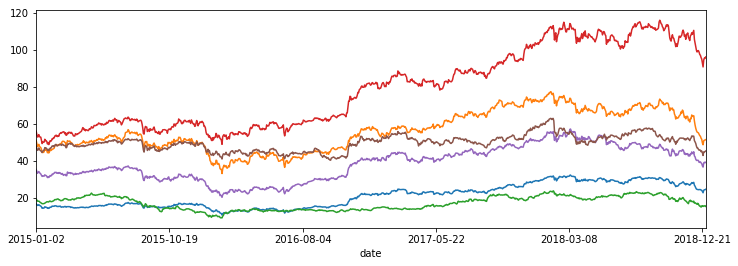

In [46]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
plt.legend()

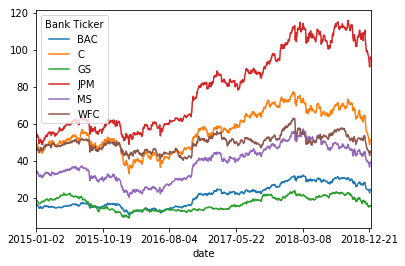

In [47]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

In [51]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


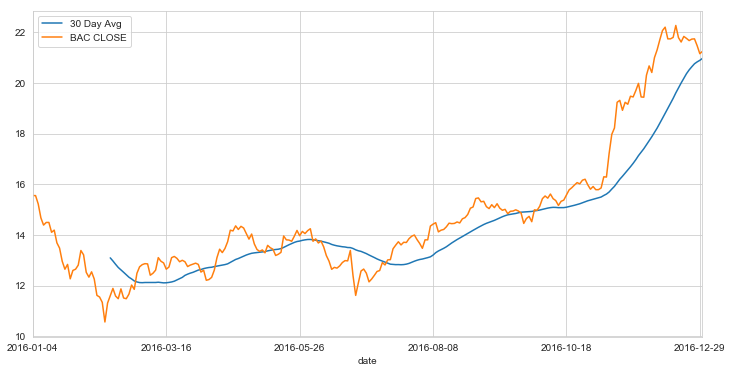

In [56]:
plt.figure(figsize=(12,6))
BAC['close'].ix['2016-01-01':'2017-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['close'].ix['2016-01-01':'2017-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

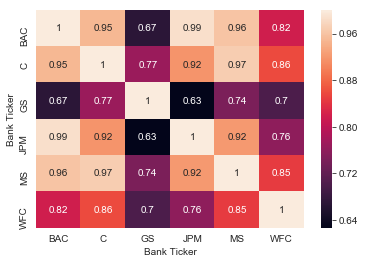

In [58]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

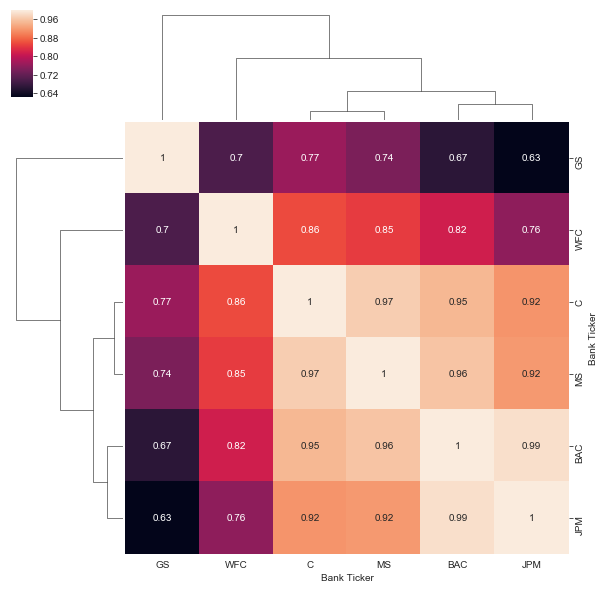

In [59]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.